In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [59]:
df = pd.read_csv('wine_data.csv')

In [60]:
#data = data[["country", "points", "province", "variety", "winery", "price"]]
df = df[["country", "points", "province", "variety", "price"]]

In [61]:
df=df.dropna()
df.head()

,country,points,province,variety,price
1,Portugal,87,Douro,Portuguese Red,15.0
2,US,87,Oregon,Pinot Gris,14.0
3,US,87,Michigan,Riesling,13.0
4,US,87,Oregon,Pinot Noir,65.0
5,Spain,87,Northern Spain,Tempranillo-Merlot,15.0


In [62]:
df['variety_count']= df.variety.map(df.variety.value_counts())
data = df[df.variety_count != 1]
data.variety_count.value_counts()

12785    12785
11077    11077
9384      9384
8466      8466
5340      5340
4971      4971
4780      4780
4086      4086
3261      3261
3061      3061
2708      2708
2593      2593
2377      2377
2331      2331
2196      2196
2167      2167
2027      2027
1788      1788
1404      1404
1388      1388
1304      1304
1211      1211
1145      1145
1002      1002
986        986
985        985
955        955
836        836
821        821
768        768
         ...  
33          99
24          96
93          93
43          86
28          84
83          83
9           81
40          80
78          78
38          76
74          74
10          70
68          68
65          65
63          63
61          61
59          59
58          58
29          58
57          57
19          57
14          56
53          53
49          49
48          48
44          44
41          41
39          39
30          30
25          25
Name: variety_count, Length: 147, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder

list_of_feaatures_to_encode = ["country", "province", "variety"]
le = LabelEncoder()

for i in list_of_feaatures_to_encode:
    enc = le.fit(np.unique(data[i].values))
    print(enc.classes_)
    data[i] = le.fit_transform(data[i])

['Argentina' 'Armenia' 'Australia' 'Austria' 'Bosnia and Herzegovina'
 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'China' 'Croatia' 'Cyprus'
 'Czech Republic' 'England' 'France' 'Georgia' 'Germany' 'Greece'
 'Hungary' 'India' 'Israel' 'Italy' 'Lebanon' 'Luxembourg' 'Macedonia'
 'Mexico' 'Moldova' 'Morocco' 'New Zealand' 'Peru' 'Portugal' 'Romania'
 'Serbia' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Switzerland'
 'Turkey' 'US' 'Ukraine' 'Uruguay']


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


['Achaia' 'Aconcagua Costa' 'Aconcagua Valley' 'Aegean' 'Agioritikos'
 'Ahr' 'Alenquer' 'Alentejano' 'Alentejo' 'Alenteo' 'Algarve' 'Alsace'
 'America' 'Amindeo' 'Amyndeon' 'Andalucia' 'Ankara' 'Apalta' 'Arcadia'
 'Arizona' 'Armenia' 'Atalanti Valley' 'Atlantida' 'Attica'
 'Australia Other' 'Austria' 'Awatere Valley' 'Baden' 'Bairrada'
 'Beaujolais' 'Beira Atlantico' 'Beira Interior' 'Beiras' 'Bekaa Valley'
 'Beotia' 'Black Sea Coastal' 'Bordeaux' 'Bot River' 'Brazil' 'Brda'
 'Breede River Valley' 'Breedekloof' 'British Columbia' 'Bucelas' 'Buin'
 'Bulgaria' 'Burgenland' 'Burgundy' 'Bío Bío Valley' 'Cachapoal Valley'
 'Cahul' 'California' 'Campanha' 'Canada Other' 'Canelones' 'Canterbury'
 'Cape Agulhas' 'Cape Peninsula' 'Cape South Coast' 'Cappadocia'
 'Carnuntum' 'Casablanca & Leyda Valleys' 'Casablanca Valley'
 'Casablanca-Curicó Valley' 'Catalonia' 'Cauquenes Valley' 'Cederberg'
 'Central Italy' 'Central Otago' 'Central Spain' 'Central Valley'
 'Cephalonia' 'Chalkidiki' 'Champagne'

In [64]:
for i in list_of_feaatures_to_encode:
    enc = le.fit(np.unique(data[i].values))
    print(enc.classes_)
    data[i] = le.fit_transform(data[i])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [65]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [66]:
#sys.pairplot(car_data, x_vars=['country','province','variety', 'price', 'points'], y_vars='price', size=7, aspect=0.7, kind='reg')




In [67]:
feature_cols = ["country", "points", "province", "variety"]
X = data[feature_cols]
print(type(X))
print(X.shape)

Y = data['price']
print(type(Y))
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
(120782, 4)
<class 'pandas.core.series.Series'>
(120782,)


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(90586, 4)
(30196, 4)
(90586,)
(30196,)


In [69]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
print(reg.intercept_)
print(reg.coef_)

-449.1251086695992
[ 0.01354764  5.54970591 -0.01192518 -0.01592775]


In [71]:
list(zip(feature_cols, reg.coef_))

[('country', 0.013547636735058629),
 ('points', 5.549705910376739),
 ('province', -0.011925175978802827),
 ('variety', -0.015927750330344992)]

In [72]:
Y_pred = reg.predict(X_test)

In [73]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

37.912742706834244


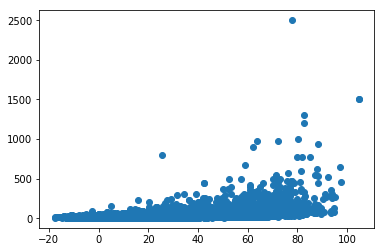

In [81]:
import matplotlib.pyplot as plt
plt.scatter(Y_pred, Y_test)

In [74]:
feature_cols = ["country", "points", "province", "variety"]

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
Y = data.price

# split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
print(reg.intercept_)
print(reg.coef_)

# fit the model to the training data (learn the coefficients)
reg.fit(X_train, Y_train)

# make predictions on the testing set
Y_pred = reg.predict(X_test)

# compute the RMSE of our predictions

print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

-449.1251086695992
[ 0.01354764  5.54970591 -0.01192518 -0.01592775]
37.912742706834244


In [79]:
X.head()
Y[1]

15.0

In [76]:
reg.predict([[39, 87, 265, 345]])

array([25.57241787])

In [77]:
data.head(2)

,country,points,province,variety,price,variety_count
1,30,87,106,356,15.0,2196
2,39,87,265,345,14.0,1388


In [ ]:
df.describe()

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(20,15))
plt.show()

In [ ]:
data_new = pd.get_dummies(df)


In [ ]:
data_new.shape

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
y = data_new["price"]
X =data_new.drop(columns=["price"])
y = y.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = ridge.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = elasticnet.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")